In [212]:
import numpy as np
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

# conda install keras

# Gradient Descent

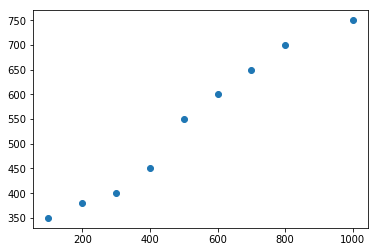

In [300]:
trainX = [100, 200, 300, 400, 500, 600, 700, 800, 1000]
trainY = [350, 380, 400, 450, 550, 600, 650, 700, 750]
plt.scatter(trainX, trainY)

In [301]:
# Función que predice costo de casa
def predict(size, weight, bias):
    # y = mx + b
    return size * weight + bias

In [302]:
# Funcion que calcula el error
def loss_function(sizes, costs, weight, bias):
    totalError = 0
    for i in range(0, len(sizes)):
        x = sizes[i]
        y = costs[i]
        totalError += (y - (weight * x + bias)) ** 2
    return totalError / float(len(sizes))

def loss_function_deriv_weight(size, cost, weight, bias, n):
    # -1/n * (y - (mx + b))
    return -(1/n) * size * (cost - predict(size, weight, bias))

def loss_function_deriv_bias(size, cost, weight, bias, n):
    # -1/n * (y - (mx + b))
    return -(1/n) * (cost - predict(size, weight, bias))

In [312]:
def step_gradient(sizes, costs, weight, bias,learningRate):
    weight_deriv = 0
    bias_deriv = 0
    m = float(len(sizes))
    
    for i in range(len(sizes)):
        x = sizes[i]
        y = costs[i]
        
        # Calculate partial derivatives of loss_function
        bias_deriv += -(2/m) * (y - ((weight * x) + bias))
        weight_deriv += -(2/m) * x * (y - ((weight * x) + bias))
    
    weight = weight - (weight_deriv * learning_rate)
    bias = bias - (learning_rate * bias_deriv)

    return weight, bias

In [339]:
def train(sizes, costs, initial_weight, initial_bias, learning_rate, epoch):
    weight = initial_weight
    bias = initial_bias
   
    for i in range(epoch):
        weight, bias = step_gradient(sizes, costs, weight, bias, learning_rate)
        if i%10 == 0:
            print("Loss: ", str(loss_function(sizes, costs, weight, bias)), "b: " , bias, "w: ", weight)
    return [b, m]

In [340]:
import csv

with open('data.csv', 'r') as f:
  r = csv.reader(f)
  points = list(r)

trainX = []
trainY = []
for point in points:
    trainX.append(float(point[0])) 
    trainY.append(float(point[1]))

In [341]:
learning_rate = 0.0001
weight = 0.0
bias = 0.0
epochs = 1000

[bias, weight] = train(trainX, trainY, bias, weight, learning_rate, epochs)
print(bias, weight)

Loss:  1484.586557408649 b:  0.014547010110737297 w:  0.7370702973591052
Loss:  112.65166489759584 b:  0.029714049245227046 w:  1.4781595857319891
Loss:  112.64990814400619 b:  0.030329617731073667 w:  1.4788952310786534
Loss:  112.64954700524882 b:  0.030930464674392876 w:  1.4788841757704807
Loss:  112.6491859224223 b:  0.031531251467959626 w:  1.4788723682497276
Loss:  112.64882489409928 b:  0.032131992902294806 w:  1.4788605608606418
Loss:  112.64846392027134 b:  0.03273268899573464 w:  1.4788487543619513
Loss:  112.64810300093023 b:  0.0333333397517163 w:  1.4788369487543538
Loss:  112.64774213606768 b:  0.033933945173661606 w:  1.4788251440377829
Loss:  112.64738132567561 b:  0.03453450526499217 w:  1.4788133402121713
0.02963934787473239 1.4774173755483797


# Backpropagation

In [311]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    print(new_m, new_b)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        print(compute_error_for_line_given_points(b, m, points))
    return [b, m]


points = genfromtxt("data.csv", delimiter=",")
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 10
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
print(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))



0.7370702973591052 0.014547010110737297
1484.586557408649
1.1067954543515157 0.02187396295959641
457.8542575737673
1.2922546649131115 0.025579224321293136
199.50998572553894
1.385283255651245 0.027467789559144355
134.50591058200533
1.4319472323843205 0.028445071981738963
118.14969342239947
1.4553540088980408 0.02896524076647862
114.0341490603815
1.4670946177201354 0.0292561141260467
112.99857731713661
1.4729832982243762 0.02943196916380713
112.7379818756847
1.4759365618962286 0.029550129024383073
112.67238435909097
1.4774173755483797 0.02963934787473239
112.65585181499746
10 0.02963934787473239 1.4774173755483797 112.65585181499746
